In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [3]:
parkinson_dataset = pd.read_csv("./parkinson.csv")
parkinson_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinson_dataset.shape

(195, 24)

In [5]:
parkinson_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
parkinson_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
def summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

summary(parkinson_dataset, "status")

   status      Ratio
1     147  75.384615
0      48  24.615385
##########################################


In [10]:
parkinson_dataset.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [12]:
X = parkinson_dataset.drop(columns = ['status', 'name'], axis=1)
Y = parkinson_dataset['status']

In [13]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [14]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [15]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(parkinson_dataset)

Observations: 195
Variables: 24
cat_cols: 1
num_cols: 22
cat_but_car: 1
num_but_cat: 1


count    195.000000
mean     154.228641
std       41.390065
min       88.333000
5%       101.879100
10%      110.719800
20%      116.330800
30%      120.258200
40%      129.177600
50%      148.790000
60%      156.821800
70%      176.258800
80%      197.678400
90%      209.891000
95%      236.507800
99%      245.926700
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64


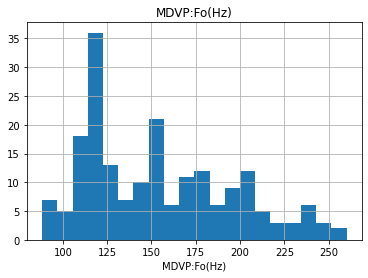

count    195.000000
mean     197.104918
std       91.491548
min      102.145000
5%       115.818800
10%      125.250200
20%      131.151800
30%      140.659200
40%      160.106600
50%      175.829000
60%      200.411400
70%      215.275000
80%      232.784600
90%      261.003000
95%      410.639800
99%      586.684060
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64


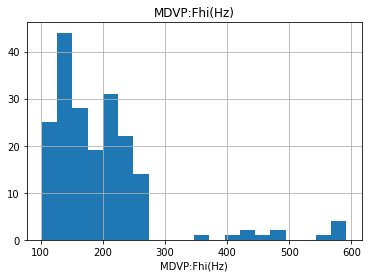

count    195.000000
mean     116.324631
std       43.521413
min       65.476000
5%        68.946400
10%       75.614600
20%       80.248600
30%       87.566800
40%       95.643600
50%      104.315000
60%      109.553400
70%      121.384800
80%      147.519000
90%      187.875800
95%      220.194900
99%      232.772200
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64


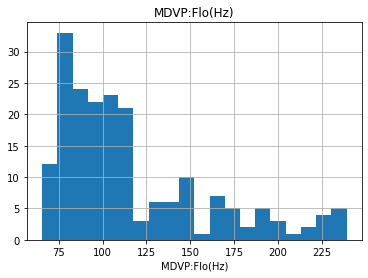

count    195.000000
mean       0.006220
std        0.004848
min        0.001680
5%         0.002211
10%        0.002648
20%        0.003156
30%        0.003692
40%        0.004384
50%        0.004940
60%        0.005468
70%        0.006904
80%        0.007664
90%        0.009882
95%        0.015561
99%        0.030168
max        0.033160
Name: MDVP:Jitter(%), dtype: float64


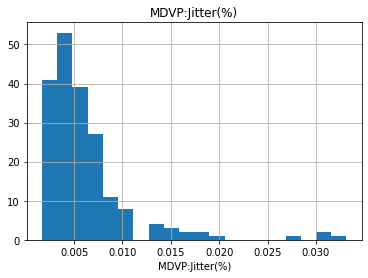

count    195.000000
mean       0.000044
std        0.000035
min        0.000007
5%         0.000010
10%        0.000010
20%        0.000020
30%        0.000030
40%        0.000030
50%        0.000030
60%        0.000040
70%        0.000050
80%        0.000060
90%        0.000080
95%        0.000100
99%        0.000164
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64


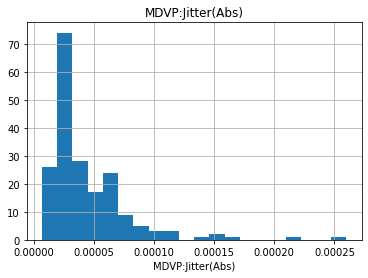

count    195.000000
mean       0.003306
std        0.002968
min        0.000680
5%         0.001118
10%        0.001252
20%        0.001566
30%        0.001714
40%        0.002102
50%        0.002500
60%        0.002910
70%        0.003624
80%        0.004124
90%        0.005400
95%        0.008756
99%        0.018032
max        0.021440
Name: MDVP:RAP, dtype: float64


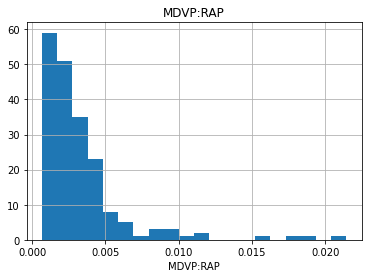

count    195.000000
mean       0.003446
std        0.002759
min        0.000920
5%         0.001315
10%        0.001452
20%        0.001726
30%        0.001982
40%        0.002316
50%        0.002690
60%        0.003154
70%        0.003504
80%        0.004336
90%        0.005712
95%        0.009083
99%        0.016323
max        0.019580
Name: MDVP:PPQ, dtype: float64


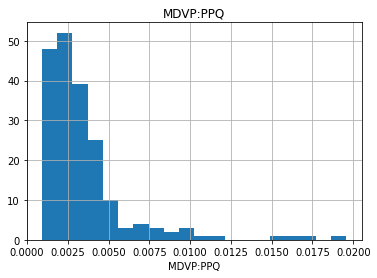

count    195.000000
mean       0.009920
std        0.008903
min        0.002040
5%         0.003354
10%        0.003758
20%        0.004692
30%        0.005150
40%        0.006304
50%        0.007490
60%        0.008730
70%        0.010870
80%        0.012364
90%        0.016202
95%        0.026271
99%        0.054107
max        0.064330
Name: Jitter:DDP, dtype: float64


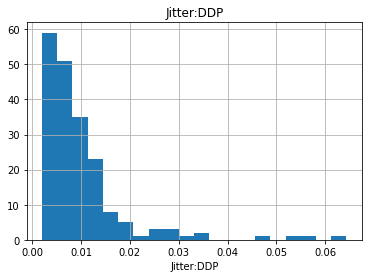

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
5%         0.011211
10%        0.012870
20%        0.015134
30%        0.017290
40%        0.020036
50%        0.022970
60%        0.027514
70%        0.032730
80%        0.041476
90%        0.055926
95%        0.067256
99%        0.091925
max        0.119080
Name: MDVP:Shimmer, dtype: float64


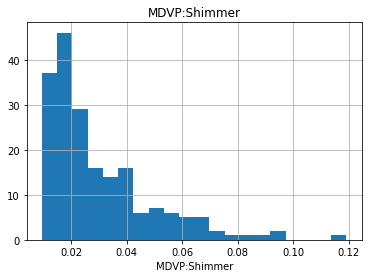

count    195.000000
mean       0.282251
std        0.194877
min        0.085000
5%         0.101800
10%        0.119800
20%        0.137000
30%        0.155000
40%        0.189600
50%        0.221000
60%        0.255400
70%        0.322600
80%        0.381400
90%        0.532000
95%        0.652700
99%        0.935280
max        1.302000
Name: MDVP:Shimmer(dB), dtype: float64


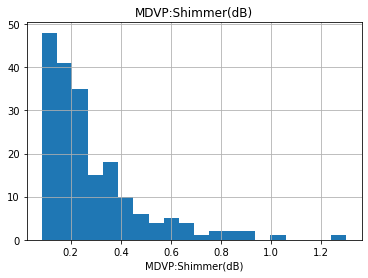

count    195.000000
mean       0.015664
std        0.010153
min        0.004550
5%         0.005368
10%        0.006358
20%        0.007690
30%        0.008754
40%        0.010694
50%        0.012790
60%        0.014624
70%        0.017858
80%        0.022364
90%        0.030116
95%        0.036227
99%        0.053696
max        0.056470
Name: Shimmer:APQ3, dtype: float64


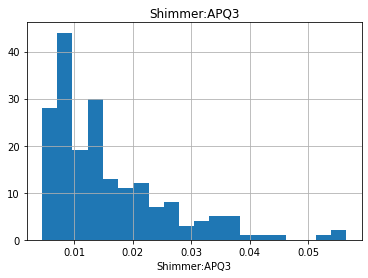

count    195.000000
mean       0.017878
std        0.012024
min        0.005700
5%         0.006383
10%        0.007522
20%        0.009210
30%        0.010216
40%        0.011738
50%        0.013470
60%        0.016154
70%        0.019338
80%        0.024746
90%        0.036972
95%        0.042701
99%        0.054338
max        0.079400
Name: Shimmer:APQ5, dtype: float64


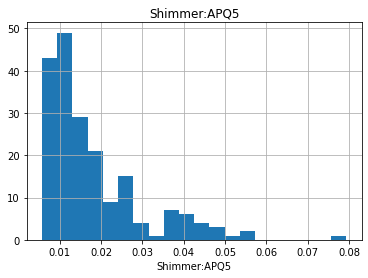

count    195.000000
mean       0.024081
std        0.016947
min        0.007190
5%         0.009114
10%        0.010654
20%        0.012436
30%        0.013598
40%        0.016300
50%        0.018260
60%        0.021052
70%        0.027602
80%        0.033996
90%        0.044298
95%        0.057718
99%        0.083474
max        0.137780
Name: MDVP:APQ, dtype: float64


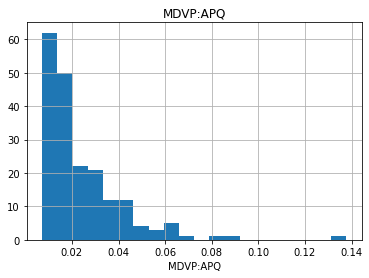

count    195.000000
mean       0.046993
std        0.030459
min        0.013640
5%         0.016107
10%        0.019064
20%        0.023078
30%        0.026270
40%        0.032072
50%        0.038360
60%        0.043882
70%        0.053584
80%        0.067102
90%        0.090350
95%        0.108678
99%        0.161088
max        0.169420
Name: Shimmer:DDA, dtype: float64


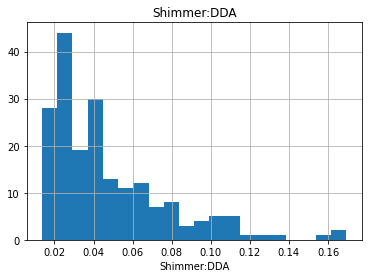

count    195.000000
mean       0.024847
std        0.040418
min        0.000650
5%         0.002528
10%        0.004066
20%        0.004878
30%        0.006754
40%        0.009080
50%        0.011660
60%        0.017256
70%        0.020180
80%        0.028934
90%        0.052348
95%        0.092044
99%        0.219660
max        0.314820
Name: NHR, dtype: float64


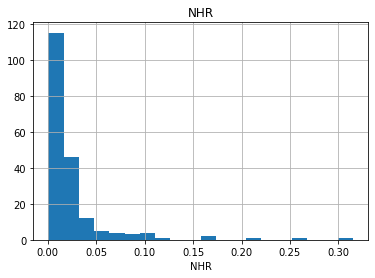

count    195.000000
mean      21.885974
std        4.425764
min        8.441000
5%        13.483800
10%       16.024800
20%       18.797600
30%       19.660000
40%       21.172600
50%       22.085000
60%       23.291400
70%       24.768600
80%       25.630800
90%       26.509400
95%       26.974200
99%       31.789120
max       33.047000
Name: HNR, dtype: float64


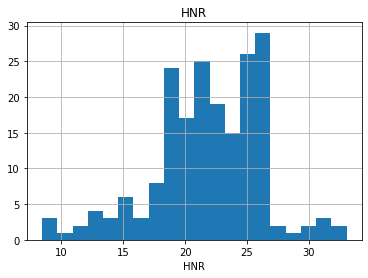

count    195.000000
mean       0.498536
std        0.103942
min        0.256570
5%         0.330929
10%        0.360582
20%        0.405570
30%        0.435192
40%        0.462688
50%        0.495954
60%        0.538285
70%        0.567277
80%        0.604067
90%        0.637479
95%        0.653220
99%        0.671723
max        0.685151
Name: RPDE, dtype: float64


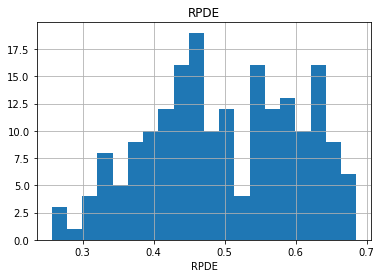

count    195.000000
mean       0.718099
std        0.055336
min        0.574282
5%         0.632338
10%        0.646415
20%        0.663641
30%        0.683254
40%        0.703014
50%        0.722254
60%        0.733997
70%        0.752450
80%        0.766307
90%        0.789799
95%        0.816038
99%        0.823579
max        0.825288
Name: DFA, dtype: float64


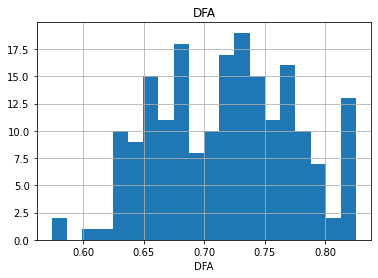

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
5%        -7.306315
10%       -7.052363
20%       -6.658207
30%       -6.276074
40%       -6.014292
50%       -5.720868
60%       -5.490110
70%       -5.251480
80%       -4.779677
90%       -4.256362
95%       -3.733614
99%       -2.924002
max       -2.434031
Name: spread1, dtype: float64


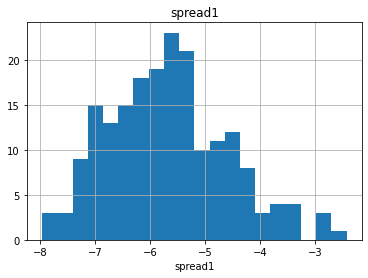

count    195.000000
mean       0.226510
std        0.083406
min        0.006274
5%         0.088839
10%        0.121354
20%        0.160192
30%        0.183319
40%        0.203036
50%        0.218885
60%        0.241625
70%        0.264500
80%        0.299848
90%        0.338407
95%        0.373139
99%        0.415932
max        0.450493
Name: spread2, dtype: float64


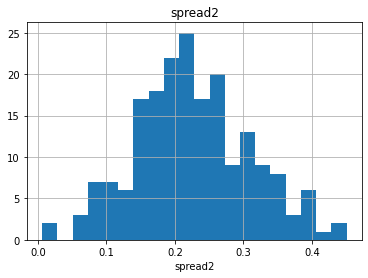

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
5%         1.848741
10%        1.925247
20%        2.039987
30%        2.139657
40%        2.265660
50%        2.361532
60%        2.445560
70%        2.545951
80%        2.671932
90%        2.922228
95%        3.084931
99%        3.323350
max        3.671155
Name: D2, dtype: float64


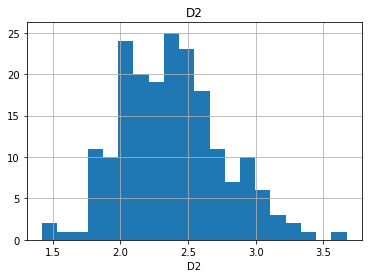

count    195.000000
mean       0.206552
std        0.090119
min        0.044539
5%         0.091587
10%        0.101992
20%        0.123000
30%        0.149197
40%        0.170422
50%        0.194052
60%        0.220530
70%        0.241351
80%        0.270411
90%        0.334078
95%        0.369571
99%        0.454890
max        0.527367
Name: PPE, dtype: float64


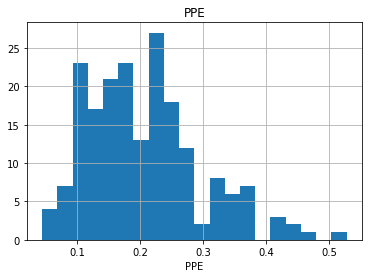

In [16]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(parkinson_dataset, col, plot=True)

In [17]:
parkinson_dataset.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


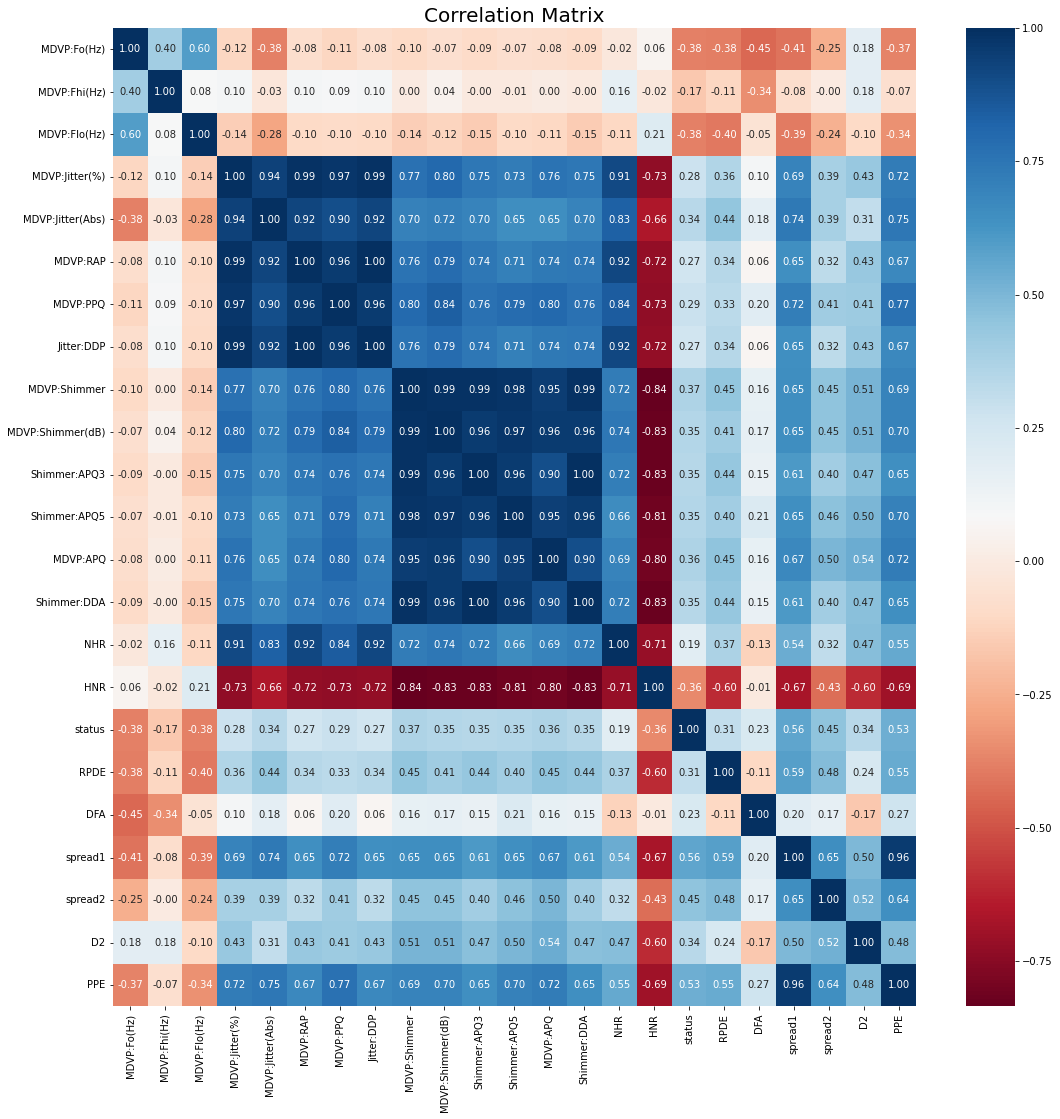

In [18]:
f, ax = plt.subplots(figsize=[18, 18])
sns.heatmap(parkinson_dataset.corr(), annot=True, fmt=".2f", ax=ax, cmap="RdBu")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [21]:
model = svm.SVC(kernel='linear')

In [22]:
model.fit(X_train, Y_train) 

SVC(kernel='linear')

In [24]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [25]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [26]:
X_test_prediction = model.predict(X_test) 
test_data_accuracy = accuracy_score(Y_test, X_test_prediction) 

In [27]:
print('Accuracy score of test data : ', test_data_accuracy) 

Accuracy score of test data :  0.8717948717948718


In [28]:

input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569) 
# changing input data to a numpy array 
input_data_as_numpy_array = np.asarray(input_data) 
# reshape the numpy array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = model.predict(input_data_reshaped) 
print(prediction) 
if (prediction[0] == 0): 
    print("The Person does not have Parkinsons Disease") 
else: print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


In [29]:
import pickle

In [31]:
filename = 'parkinsons_model.sav' 
pickle.dump(model, open(filename, 'wb'))

In [32]:
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [33]:
for column in X.columns: print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
